## **Credit Risk Analysis and Prediction for Prospera Bank**

## **Introduction**


In today’s banking ecosystem, effective risk management is crucial for maintaining financial stability and ensuring sustainable growth. As financial institutions increasingly embrace data-driven strategies, they seek innovative ways to identify and mitigate risks.

This analysis centers on Prospera Bank, a mid-sized financial institution that provides diverse credit and loan services. The goal is to develop a predictive model for assessing the likelihood of loan default, utilizing historical loan data. By uncovering key patterns and insights, this model aims to enhance risk management, minimize financial losses, and streamline the loan approval process, ensuring data-backed and responsible lending decisions.

## **Analysis Objective**

The objective of this analysis is to analyze historical loan data to identify key factors contributing to loan defaults. This will involve generating visual summaries to highlight borrower trends and behaviors linked to default risks. Additionally, machine learning models will be developed to predict the probability of loan defaults, enabling Prospera Bank to make more informed and strategic lending decisions. By integrating these insights, the analysis will support improved risk management and minimize potential financial losses.

## **Data Description**

The dataset contains information on loan applicants, including their demographic details, financial history, loan characteristics, and repayment behavior.

## **Data Dictionary**

The dataset contains historical information about Prospera Bank's customers and their loan performance.

Below are the columns:
- `person_age`: Age of the applicant.
- `person_income`: Annual income of the applicant.
- `person_home_ownership`: Type of home ownership (e.g., RENT, OWN, MORTGAGE).
- `person_emp_length`: Employment length of the applicant in years.
- `loan_inten`t: Purpose of the loan (e.g., PERSONAL, EDUCATION, MEDICAL).
- `loan_grade`: Grade assigned to the loan based on creditworthiness.
- `loan_amnt`: Amount of the loan requested.
- `loan_int_rate`: Interest rate on the loan.
- `loan_status`: Target variable indicating loan default (1) or repayment (0).
- `loan_percent_income`: Loan amount as a percentage of annual income.
- `cb_person_default_on_file`: Whether the applicant has a history of default (Y/N).
- `cb_person_cred_hist_length`: Length of the applicant's credit history in years.

## **Data Analysis and Visualization**


### **Data Import and Data Cleaning**

#### **Importing the required libraries**

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### **Importing and understanding the structure of the data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [ ]:
# house the data in a variable called credit_data
credit_data = pd.read_csv('credit_risk_dataset.csv')
# returns the first 5 rows
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


**Observation:**

The `credit_risk` data contained a total of 12 columns.

### **Understanding the Data**

**Check the number of rows and columns present in the data**

In [ ]:
# Get the number of rows and columns
rows, columns = credit_data.shape

print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 32581 rows and 12 columns.


**Check data types of the columns in the dataset**

In [ ]:
# Display the datatypes of the different columns
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**Observations:**

The dataset has 32581 entries and 12 columns. The columns `person_age`, `person_income`, `loan_amt`, `loan_status`, `cb_person_cred_hist_length are integers (int64), person_home_ownership`, `loan_intent`, `loan_grade`, `cb_person_default_on_file` are object data types (object), while `person_emp_length`, `loan_int_rate`, and `loan_percent_income` are float data types (float64).

The dataset uses approximately 3.0+ MB of memory.

**Check for missing values or inconsistencies and handle them appropriately**

In [ ]:
# Check for missing values
missing_values = credit_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


**Observations:**

Two columns in total have missing values.

`person_emp_length` has 895 missing values, and `loan_int_rate` has 3,116 missing values.

In [ ]:
# Handle missing values for `person_emp_length` and `loan_int_rate`
credit_data['person_emp_length'].fillna(credit_data['person_emp_length'].median(), inplace=True)
credit_data['loan_int_rate'].fillna(credit_data['loan_int_rate'].median(), inplace=True)

<ipython-input-7-7d1343653558>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_data['person_emp_length'].fillna(credit_data['person_emp_length'].median(), inplace=True)
<ipython-input-7-7d1343653558>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
# Verifying the dataset to ensure all missing values have been filled
missing_values = credit_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

data_info = credit_data.info()
print("\nDataset information:")
print(data_info)

Missing values in each column:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   lo

**Observations:**

All missing values are filled, and each column now contains 32,581 records.

**Summary Statistics: Generate summary statistics for numerical columns to get an overview of the data**

In [ ]:
# Summary statistics to understand the distribution of the data
summary_statistics = credit_data.describe()
print("The statistical summary of the data:")
print(summary_statistics)

The statistical summary of the data:
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       32581.000000  32581.000000   
mean      27.734600   6.607485e+04           4.767994   9589.371106   
std        6.348078   6.198312e+04           4.087372   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32581.000000  32581.000000         32581.000000   
mean       11.009620      0.218164             0.170203   
std         3.081611      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.

**Observations:**

- `person_age`: The average age of applicants is approximately 27.73 years. Ages range from 20 to 144 years, though the maximum age of 144 might indicate potential outliers or data entry errors. Half of the applicants are aged 26 or below, while 25% are 23 years old or younger.

- `person_income`: The average annual income of applicants is around 66,075, with incomes ranging widely from 4,000 to 6,000,000. This large spread, combined with a high standard deviation of 61,983, suggests significant variability in applicant income. Half of the applicants earn 55,000 or less annually, with a quarter earning 38,500 or less, indicating a concentration of lower-income applicants.

- `person_employment_length`: The average employment length is approximately 4.77 years, with a standard deviation of 4.09 years. Employment lengths range from 0 to an exceptionally high 123 years, which likely indicates a data entry error. Half of the applicants have been employed for 4 years or less, and 25% for 2 years or less, suggesting that many applicants are early in their careers.

- `loan_amount`:Loan amounts vary from as low as 500 to a maximum of 35,000, with an average loan amount of 9,589.37 and a standard deviation of 6,322.08. A quarter of the loans are 5,000 or less, while half are 8,000 or less, indicating a concentration of smaller loans.

- `loan_interest_rate`: The average loan interest rate is 11.01%, with a standard deviation of 3.08%, indicating moderate variability. Interest rates range from 5.42% to 23.22%, showing a significant spread in loan pricing, likely reflecting differences in risk profiles.

- `loan_status`: The loan_status variable, indicating whether a loan was approved, has a mean value of 0.218, suggesting that approximately 21.8% of loans were approved. This binary variable is concentrated at 0 (not approved) for most applicants.

- `loan_percent_income`: The percentage of income requested as a loan averages 17.02%, with a range from 0 to 83%. Most applicants requested loans amounting to 23% or less of their income, as indicated by the 75th percentile.

- `cb_person_credit_history_length`: The average credit history length of applicants is 5.80 years, with a standard deviation of 4.06 years. Credit history lengths range from 2 to 30 years. Half of the applicants have a credit history of 4 years or less, with a quarter having 3 years or less, suggesting a mix of newer and more experienced credit users.

In [ ]:
# removing records of person's age >100 as these are the extreme case scenarios or possibly data reading error
credit_data = credit_data.drop(credit_data[credit_data['person_age'] > 100].index)

In [ ]:
# Re-verifying the dataset
data_info = credit_data.info()
print("\nDataset information:")
print(data_info)

<class 'pandas.core.frame.DataFrame'>
Index: 32576 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32576 non-null  int64  
 1   person_income               32576 non-null  int64  
 2   person_home_ownership       32576 non-null  object 
 3   person_emp_length           32576 non-null  float64
 4   loan_intent                 32576 non-null  object 
 5   loan_grade                  32576 non-null  object 
 6   loan_amnt                   32576 non-null  int64  
 7   loan_int_rate               32576 non-null  float64
 8   loan_status                 32576 non-null  int64  
 9   loan_percent_income         32576 non-null  float64
 10  cb_person_default_on_file   32576 non-null  object 
 11  cb_person_cred_hist_length  32576 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB

Dataset information:
None


**Observation:**

Records of customers with an age greater than 100 were dropped, as these were assumed to be outliers or data entry errors. Following this adjustment, each column in the dataset now contains 32,576 records. The data is clean and ready for further analysis.

## **Exploratory Insights**

- **Correlation Analysis**

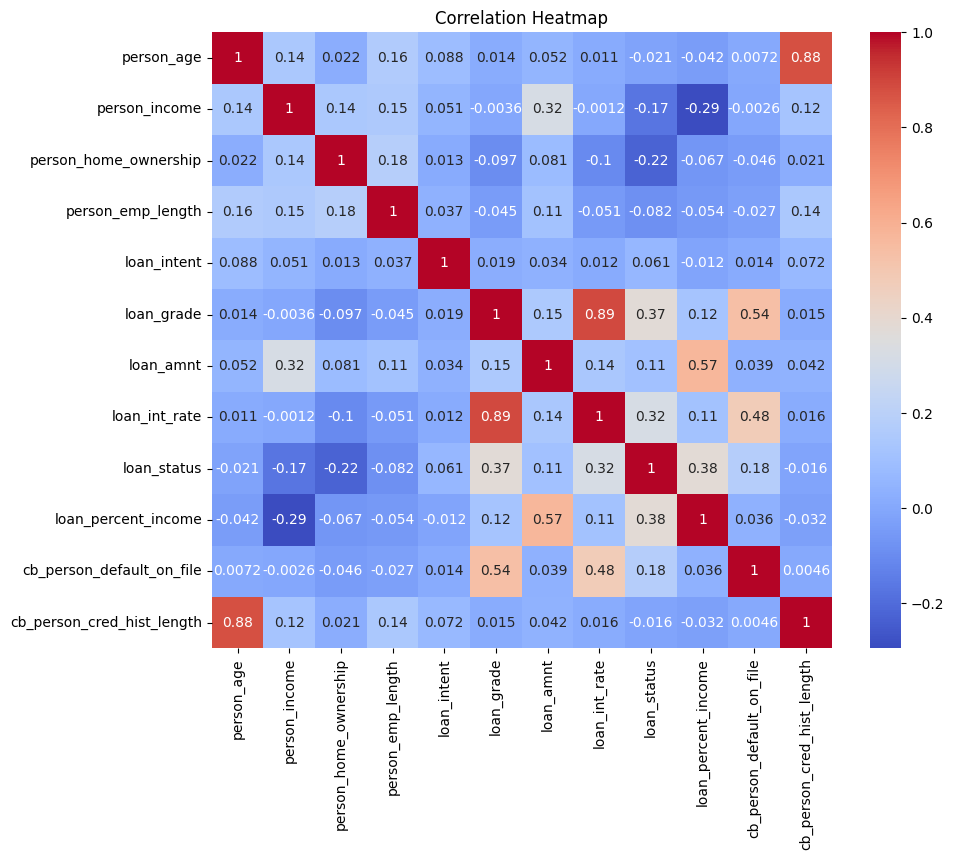

In [ ]:
# Manually encode the categorical variables
encoded_credit_data = credit_data.copy()

#'person_home_ownership'
home_ownership_mapping = {
    'RENT': 0,
    'MORTGAGE': 1,
    'OWN': 2,
    'OTHER': 3
}

# Apply the mapping to the 'person_home_ownership' column
encoded_credit_data['person_home_ownership'] = encoded_credit_data['person_home_ownership'].map(home_ownership_mapping)

# 'loan_intent'
loan_intent_mapping = {
    'EDUCATION': 0,
    'MEDICAL': 1,
    'VENTURE': 2,
    'PERSONAL': 3,
    'DEBTCONSOLIDATION': 4,
    'HOMEIMPROVEMENT': 5
}
encoded_credit_data['loan_intent'] = encoded_credit_data['loan_intent'].map(loan_intent_mapping)

# loan_grade
loan_grade_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}
encoded_credit_data['loan_grade'] = encoded_credit_data['loan_grade'].map(loan_grade_mapping)

# cb_person_default_on_file
default_on_file_mapping = {
    'N': 0,
    'Y': 1
}
encoded_credit_data['cb_person_default_on_file'] = encoded_credit_data['cb_person_default_on_file'].map(default_on_file_mapping)

# Heat map
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_credit_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Observations:**

Looking at the correlation of other variables to the target variable, Below are the variables correlated with `loan_status`:

- `loan_percent_income`: Correlation = 0.38: Indicates a moderate positive correlation. As the percentage of income spent on loan payments increases, loan status changes (potentially defaulting).

- `loan_amnt`: Correlation = 0.32:  Suggests a positive relationship; higher loan amounts may influence loan status.

- `cb_person_default_on_file`: Correlation = 0.18: Weak positive correlation; having a default history slightly affects loan status.

- `loan_grade`: Correlation = 0.12: Weak positive correlation; better grades marginally influence loan status.

- `person_income`: Correlation = -0.17: Weak negative correlation; higher income slightly decreases the likelihood of certain loan statuses (like defaulting).

The above insight will guide our exploaratory analysis.




- **Overview of customers loan status**

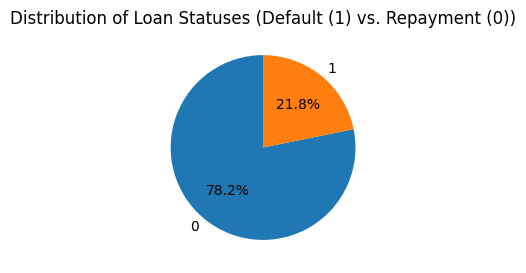

In [ ]:
# Pie Chart
credit_loan_status = credit_data['loan_status'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(credit_loan_status, labels=credit_loan_status.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Loan Statuses (Default (1) vs. Repayment (0))")
plt.show()

**Observations**:

The chart above provides an overview of the loan_status. It indicates whether a loan resulted in default (represented by 1) or successful repayment (represented by 0).

- 78.2% of loans were successfully repaid (loan_status = 0): This majority portion indicates that most borrowers fulfilled their loan obligations.

- 21.8% of loans defaulted (loan_status = 1): A significant portion of borrowers defaulted on their loans.

- **Customers Demographic Analysis**

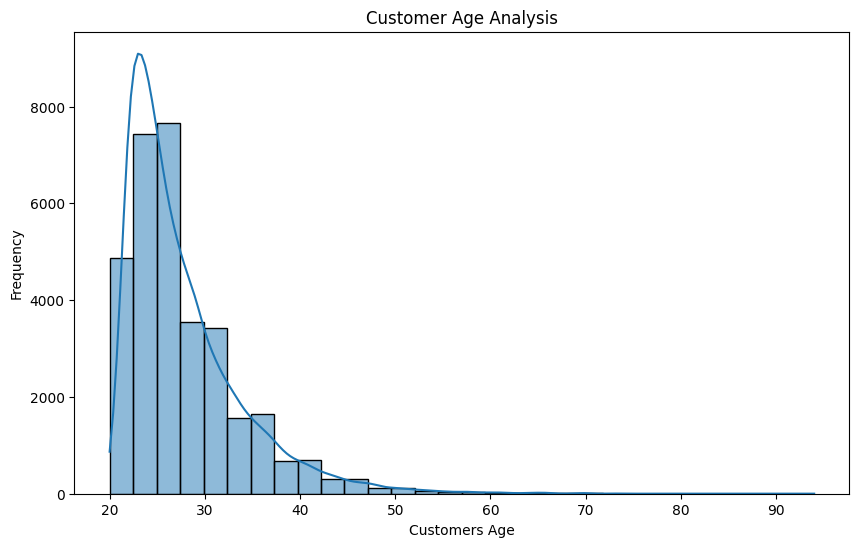

In [ ]:
# Distribution of Customers Age
plt.figure(figsize=(10,6))
sns.histplot(credit_data['person_age'], bins=30, kde=True)
plt.title('Customer Age Analysis')
plt.xlabel('Customers Age')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The majority of customers are concentrated in the younger age range (around 20–30 years old). This is evident from the peak frequency between 20 and 30 years. Furthermore, the distribution shows a steep decline as age increases, indicating fewer older customers in the dataset.

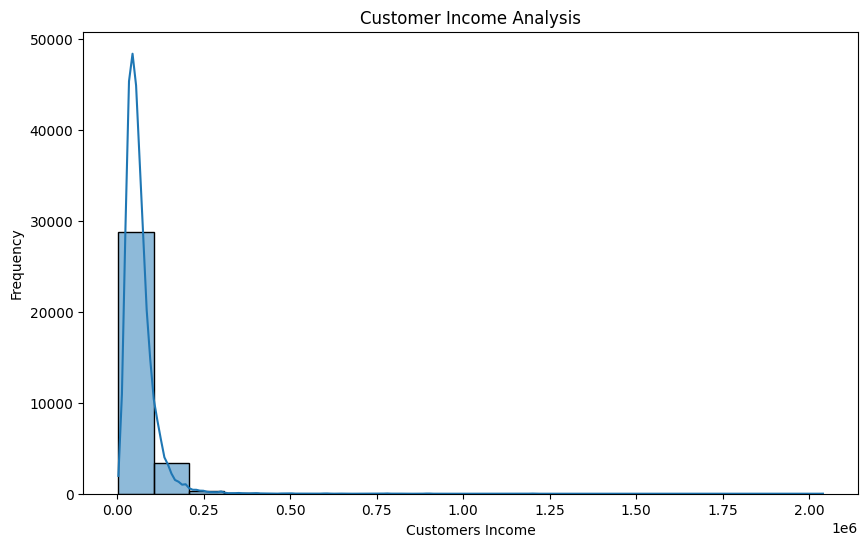

In [ ]:
# Customers Income Analysis
plt.figure(figsize=(10,6))
sns.histplot(credit_data['person_income'], bins=20, kde=True)
plt.title('Customer Income Analysis')
plt.xlabel('Customers Income')
plt.ylabel('Frequency')
plt.show()

**Observation:**

Most customer incomes are clustered at the lower end of the income scale, with frequencies decreasing as income increases.


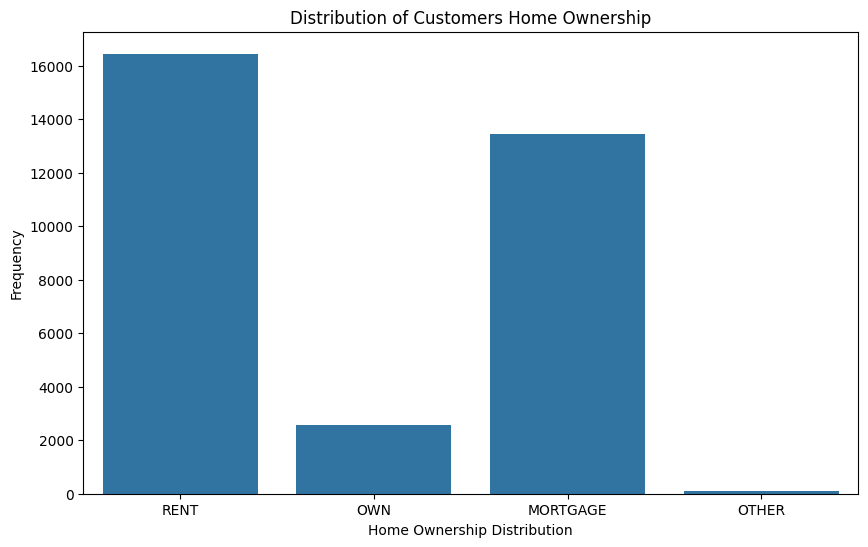

In [ ]:
# Distribution of person_home_ownership
plt.figure(figsize=(10,6))
sns.countplot(data=credit_data, x='person_home_ownership')
plt.title('Distribution of Customers Home Ownership')
plt.xlabel('Home Ownership Distribution')
plt.ylabel('Frequency')
plt.show()

**Observations:**

- The largest group of customers is renters (RENT), with a frequency of approximately 16,000. This suggests renting is the most prevalent home ownership status among the customer base.
- Customers with mortgages (MORTGAGE) form the second-largest group, slightly lower in frequency than renters, indicating a significant portion of customers are paying for their homes.
- Customers who fully own their homes (OWN) form a smaller group, with a much lower frequency than the top two categories.
- OTHER is the smallest group, suggesting very few customers have alternative forms of home ownership.

- **Examining Loan Characteristics**

<function matplotlib.pyplot.show(close=None, block=None)>

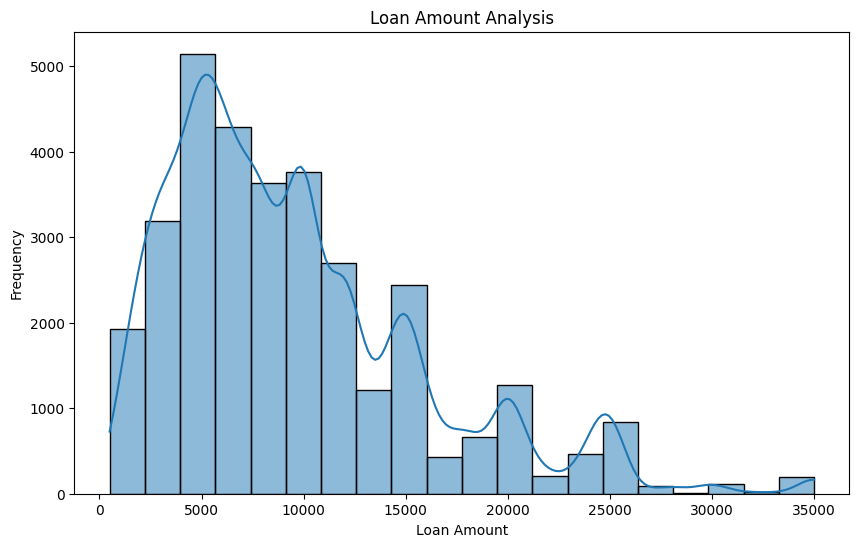

In [ ]:
# Distribution of Loan Amounts
plt.figure(figsize=(10,6))
sns.histplot(credit_data['loan_amnt'], bins=20, kde=True)
plt.title('Loan Amount Analysis')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show

**Observation:**

The chart shows that the majority of customers borrow loans in the range of 5,000 to 10,000, making it the most common loan bracket. Loan amounts above 20,000 are less frequent, indicating that larger loans are uncommon among the customer base.

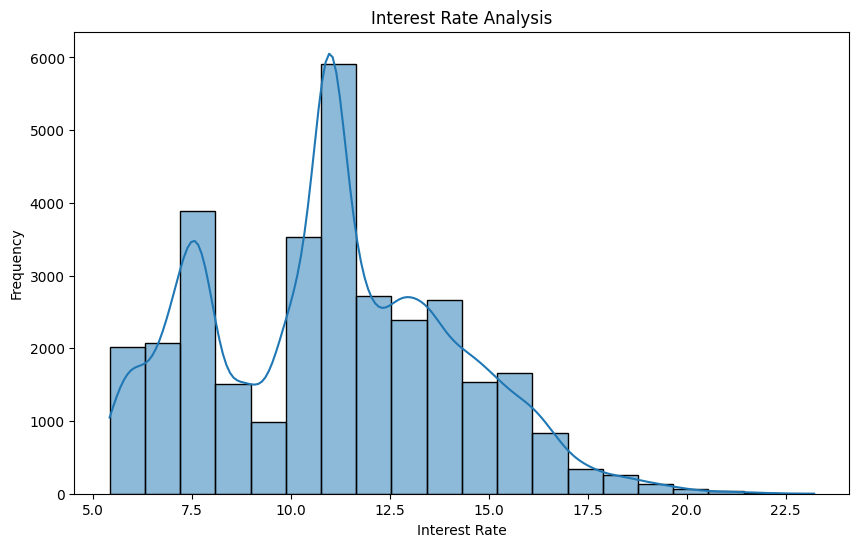

In [ ]:
# Distribution of Interest Rates
plt.figure(figsize=(10,6))
sns.histplot(credit_data['loan_int_rate'], bins=20, kde=True)
plt.title('Interest Rate Analysis')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

**Observation:**

The chart highlights that the majority of interest rates are clustered between 10% and 12.5%, making this range the most common.  Additionally, there is a secondary peak around 7.5%, indicating a smaller but notable presence of lower rates.

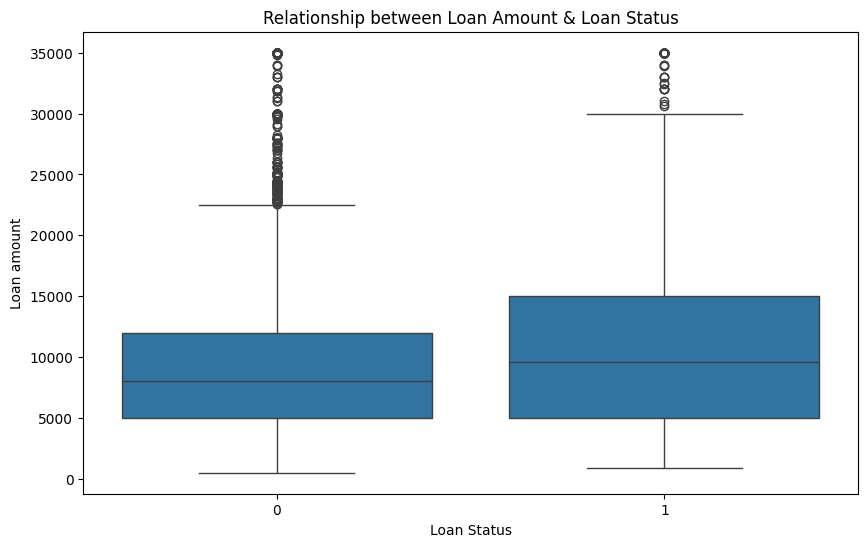

In [ ]:
# Relationship between Loan Amount & Loan Status: To identify if larger loans are more prone to default
plt.figure(figsize=(10,6))
sns.boxplot(data = credit_data, x='loan_status', y='loan_amnt')
plt.title('Relationship between Loan Amount & Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan amount')
plt.xticks(rotation=0 )
plt.show()


**Observation:**

The boxplot shows that defaulted loans (Status 1) generally have higher loan amounts and greater variability compared to repaid loans (Status 0). While repaid loans are concentrated around smaller amounts, defaults are more common with larger loans, indicating that higher loan amounts carry a greater risk of default.

Additionally, While repaid loans (Status 0) also include some high loan amounts (outliers), the frequency and magnitude of these outliers are greater for defaulted loans.

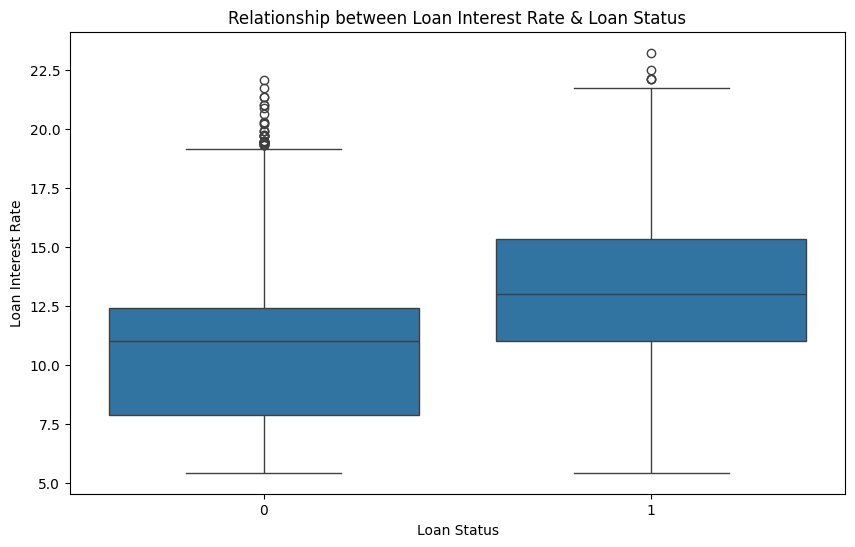

In [ ]:
# Relationship between Loan Interest Rate vs. Loan Status
plt.figure(figsize=(10,6))
sns.boxplot(data = credit_data, x='loan_status', y='loan_int_rate')
plt.title('Relationship between Loan Interest Rate & Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Interest Rate')
plt.xticks(rotation=0 )
plt.show()

**Observation:**

This boxplot illustrates the relationship between loan interest rates and loan statuses (0 for repaid loans and 1 for defaulted loans). Defaulted loans tend to have slightly higher median interest rates compared to repaid loans. However, repaid loans show a higher concentration of outliers with very high interest rates above 20%. This suggests that higher interest rates may contribute to loan defaults, but some borrowers with high interest rates still manage to repay successfully.

Text(0.5, 0, 'Loan Grade')

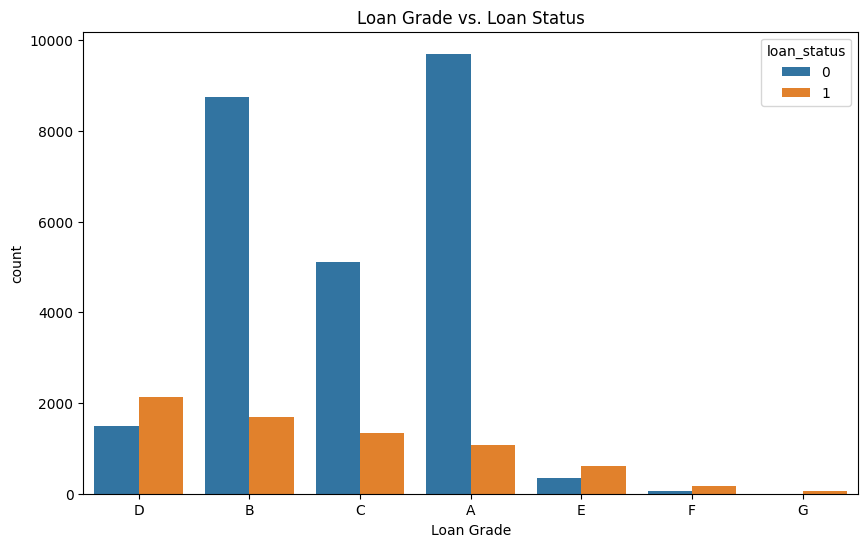

In [ ]:
# How loan grade influences loan status
plt.figure(figsize=(10,6))
sns.countplot(data=credit_data, x='loan_grade', hue='loan_status')
plt.title('Loan Grade vs. Loan Status')
plt.xlabel('Loan Grade')

**Observation:**

The chart highlights that loans with higher grades, such as A and B, are predominantly repaid, indicating lower risk. However, as loan grades decrease to C, D, and beyond, the proportion of defaults increases significantly. Grades E, F, and G show a smaller volume of loans but a higher tendency to default, suggesting higher risk. This pattern demonstrates that as loan grades decrease, the likelihood of default increases, highlighting a direct correlation between lower grades and higher risk.

- **Understanding Customers Credit Behaviour**

<function matplotlib.pyplot.show(close=None, block=None)>

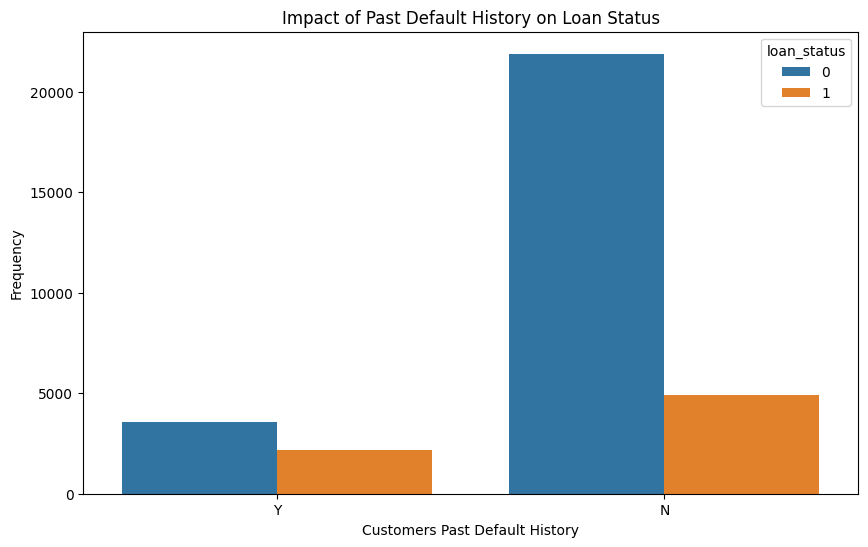

In [ ]:
# Compare customers loan default details (Yes/No) with loan_status to analyze the impact of past default history
plt.figure(figsize=(10,6))
sns.countplot(data=credit_data, x='cb_person_default_on_file', hue='loan_status')
plt.title('Impact of Past Default History on Loan Status')
plt.xlabel('Customers Past Default History')
plt.ylabel('Frequency')
plt.show


**Observations:**

The chart indicates the impact of customers' past default history on loan outcomes. Customers with no past default history ("N") overwhelmingly repay their loans, as seen from the dominant blue bar. However, customers with a history of defaults ("Y") show a higher likelihood of defaulting again (represented by the orange bar). This suggests that past default behavior is a strong predictor of future loan performance, emphasizing the importance of assessing past credit behavior in risk evaluations.

<function matplotlib.pyplot.show(close=None, block=None)>

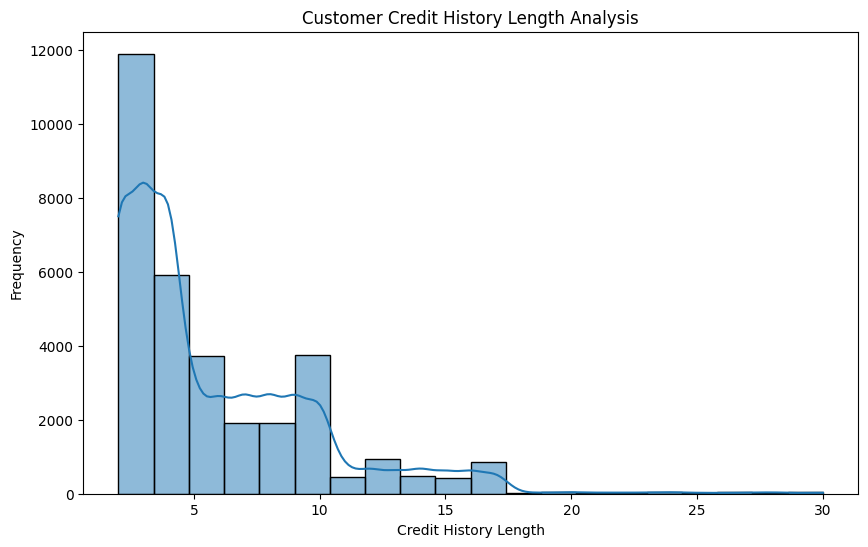

In [ ]:
# Distribution of customers credit history length to understand customers typical credit history lengths
plt.figure(figsize=(10,6))
sns.histplot(credit_data['cb_person_cred_hist_length'], bins=20, kde=True)
plt.title('Customer Credit History Length Analysis')
plt.xlabel('Credit History Length')
plt.ylabel('Frequency')
plt.show

**Observations:**


The chart shows the distribution of customers credit history lengths. The majority of customers have a relatively short credit history, primarily concentrated between 0 to 5 years. There is a steep decline in frequency as credit history length increases, with very few customers having a history longer than 15 years. This indicates that most borrowers are relatively new to credit, which could have implications for assessing their creditworthiness and understanding their risk profiles.

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

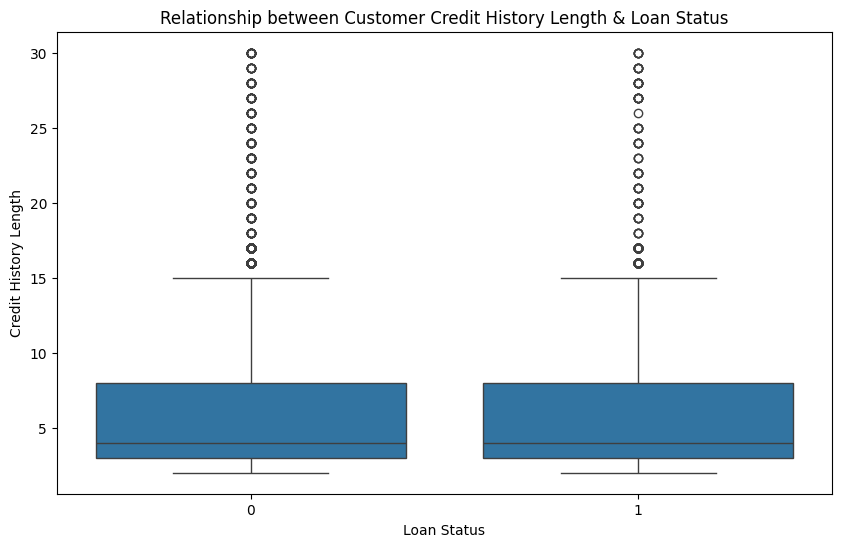

In [ ]:
# Relationship between customer credit history lengths and loan status
plt.figure(figsize=(10,6))
sns.boxplot(data = credit_data, x='loan_status', y='cb_person_cred_hist_length')
plt.title('Relationship between Customer Credit History Length & Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit History Length')
plt.xticks(rotation=0 )

**Observations:**

The box plot demonstrates the relationship between customer credit history length and loan status.

From the visualization, the distributions of credit history length for both repaid loans (Loan Status 0) and defaulted loans (Loan Status 1) are fairly similar. This indicates that credit history length alone may not be a decisive factor in determining loan repayment outcomes.

- **Loan Risk Analysis**

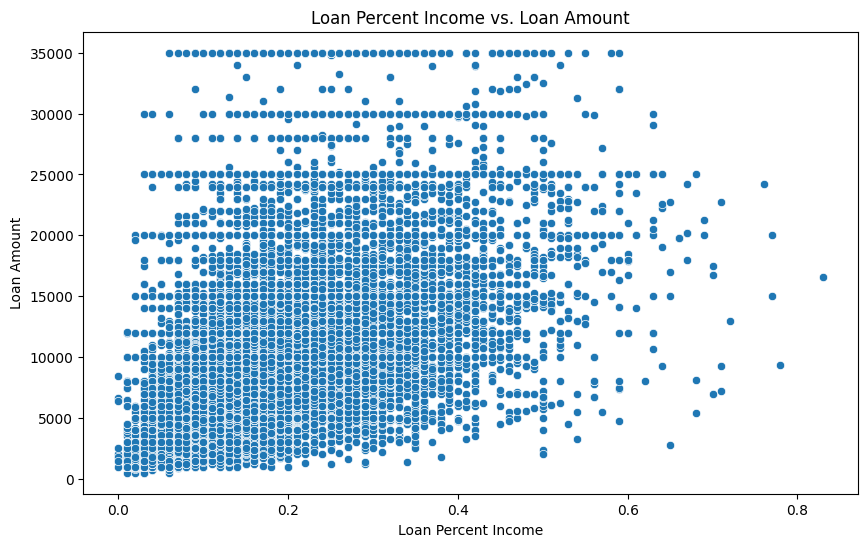

In [ ]:
# loan_percent_income vs. loan_amnt to assess if applicants are taking on loans disproportionately large relative to their income.
plt.figure(figsize=(10,6))
sns.scatterplot(data=credit_data, x='loan_percent_income', y='loan_amnt')
plt.title('Loan Percent Income vs. Loan Amount')
plt.xlabel('Loan Percent Income')
plt.ylabel('Loan Amount')
plt.show()

**Observations:**

The scatter plot shows a clear link between loan amount and the percentage of income it represents. Most loans are under 15,000, with a loan percent income below 0.4. As loan amounts increase, the percentage of income varies more, showing differences in borrower income levels. Some cases where the percentage of income is above 0.6 suggest that these loans take up a large part of the borrower’s income, which could mean higher financial strain. The highest loan amount seems capped at 35,000, and smaller loans are the most common in the data.

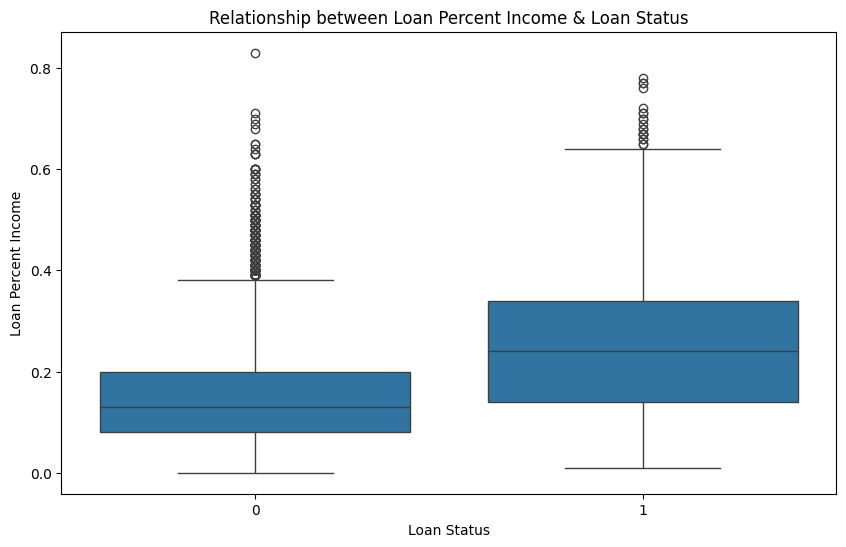

In [ ]:
# Relationship between loan_percent_income and loan_status
plt.figure(figsize=(10,6))
sns.boxplot(data = credit_data, x='loan_status', y='loan_percent_income')
plt.title('Relationship between Loan Percent Income & Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Percent Income')
plt.xticks(rotation=0 )
plt.show()

**Observations:**

The box plot highlights a clear difference in loan percent income between loans that were repaid (status 0) and those that defaulted (status 1). Borrowers who defaulted generally had higher loan percent income values, indicating that a larger portion of their income was allocated to their loan payments. The median loan percent income for defaulted loans is significantly higher than for repaid loans. Outliers are present in both categories, but they are more pronounced among repaid loans, potentially indicating unique cases of high-income borrowers. This suggests that loan percent income could be a critical factor in predicting loan repayment behavior.

- **Loan Intent Analysis**

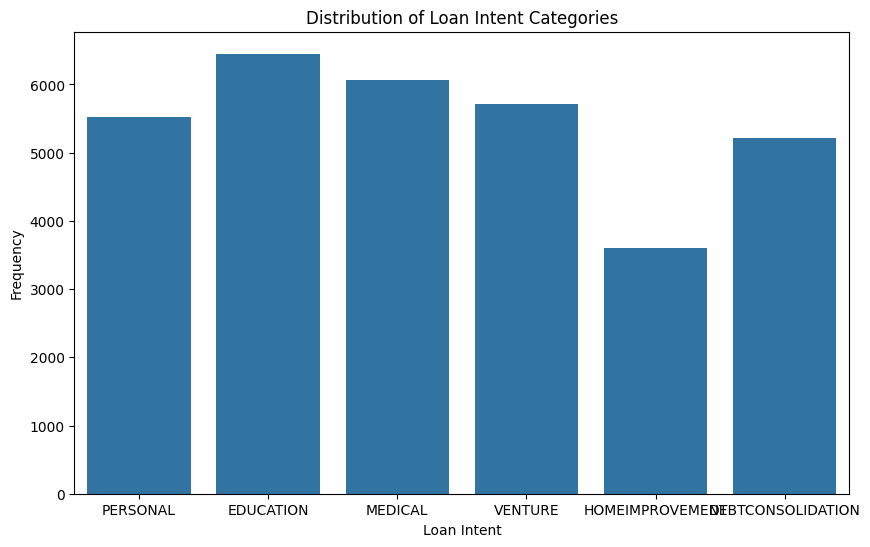

In [ ]:
# Distribution of loan_intent categories
plt.figure(figsize=(10,6))
sns.countplot(data=credit_data, x='loan_intent')
plt.title('Distribution of Loan Intent Categories')
plt.xlabel('Loan Intent')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The bar chart shows that education loans are the most common, with over 6,000 instances, highlighting their significance as a primary loan intent. Medical, venture, and personal loans follow, with personal loans slightly more frequent than debt consolidation loans. This suggests that borrowers prioritize education, medical expenses, and ventures, while debt consolidation and personal needs remain important but slightly less frequent. Home improvement loans have the lowest frequency, indicating they are less common.

This distribution underlines that essential needs, like education and medical expenses, drive the majority of loan requests.

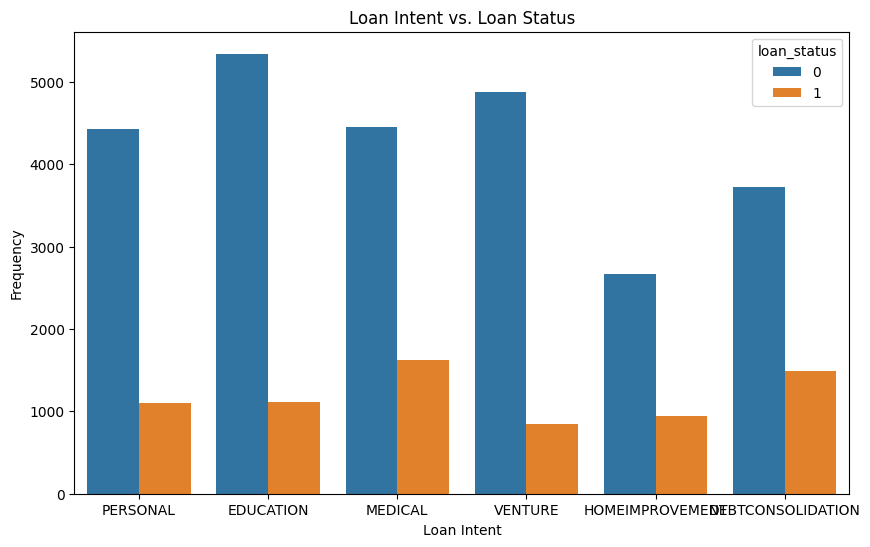

In [ ]:
# Comparing loan_intent categories with loan_status to determine which loan purposes are riskier.
plt.figure(figsize=(10,6))
sns.countplot(data=credit_data, x='loan_intent', hue='loan_status')
plt.title('Loan Intent vs. Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Frequency')
plt.show()


**Observations:**

The chart shows how different loan intents correlate with loan repayment status. Education loans have the best repayment performance, with very few defaults, making them the least risky. On the other hand, debt consolidation loans stand out as the riskiest, with a notable number of defaults. Personal, medical, and venture loans generally show a strong trend of repayment but carry moderate default risks. Home improvement loans fall somewhere in the middle, with higher defaults than personal or education loans but not as severe as debt consolidation. This indicates that loan intent can be a strong indicator of default risk, with some categories (like education) being safer investments than others (like debt consolidation).

- **Customers Segmentation Analysis**

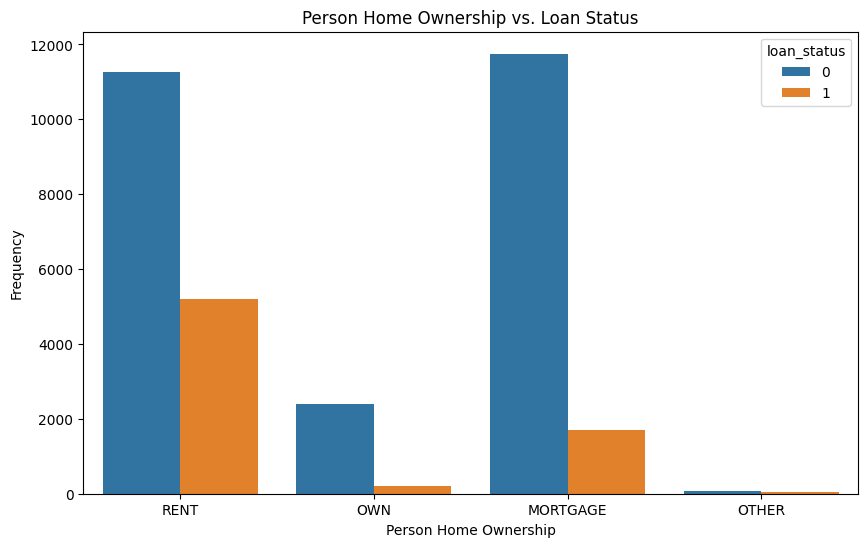

In [ ]:
# Compare person_home_ownership across loan_status categories to identify patterns.
plt.figure(figsize=(10,6))
sns.countplot(data=credit_data, x='person_home_ownership', hue='loan_status')
plt.title('Person Home Ownership vs. Loan Status')
plt.xlabel('Person Home Ownership')
plt.ylabel('Frequency')
plt.show()


**Observations:**

The chart examines the relationship between home ownership status and loan repayment behavior. Borrowers who rent their homes have a relatively high default rate compared to other homeownership categories, suggesting a potentially higher financial risk for this group. While renters have a significant number of successfully repaid loans, the proportion of defaults remains notably larger than for homeowners.

Borrowers with mortgages demonstrate strong repayment behavior, with defaults being much less frequent relative to their total loan volume. This suggests that having a mortgage might correlate with greater financial stability or access to resources for loan repayment. Meanwhile, individuals who fully own their homes represent a much smaller loan volume overall, with very few defaults, indicating strong repayment reliability in this group.

Lastly, the "Other" category has minimal representation and shows almost negligible defaults, but this might be due to the smaller dataset size in this group. Overall, renters show the greatest risk of default, while homeowners, especially those with full ownership or mortgages, exhibit greater repayment reliability.

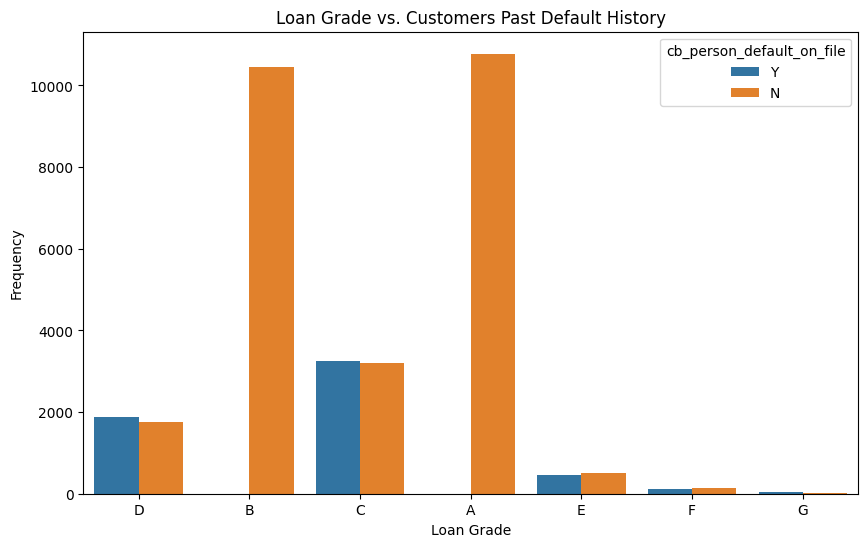

In [ ]:
# Segmentation by loan_grade and cb_person_default_on_file to identify groups with higher default risks.
plt.figure(figsize=(10,6))
sns.countplot(data=credit_data, x='loan_grade', hue='cb_person_default_on_file')
plt.title('Loan Grade vs. Customers Past Default History')
plt.xlabel('Loan Grade')
plt.ylabel('Frequency')
plt.show()


**Observations:**

The chart explores the relationship between loan grade and customers' past default history. Customers with no prior defaults (marked as "N") dominate in higher loan grades, particularly grade A, which is associated with the largest number of loans. This suggests that loan grade A is primarily issued to individuals with a clean credit history, reflecting its lower risk profile.

For lower loan grades such as C, D, E, F, and G, customers with a history of defaults (marked as "Y") are proportionally more prominent. This indicates that lower loan grades are often assigned to riskier borrowers, likely due to their past credit behavior.

Overall, the data reinforces that higher loan grades are reserved for borrowers with strong credit histories, while lower grades include a significant proportion of customers with prior defaults, reflecting a direct correlation between past credit behavior and loan grade assignment.

- **Summary of Exploratory Insights**

The EDA reveals significant patterns in loan repayment and default behavior. Most loans are successfully repaid (78.2%), but a notable 21.8% result in default. Borrowers are predominantly young (20–30 years old) and often have low incomes, with renters showing higher default rates compared to homeowners. Higher loan amounts, increased interest rates, and loans taking up a larger proportion of income are strongly associated with default risk.

Loan grades and intent further clarify risk levels—education loans and higher grades (A, B) are safer, while debt consolidation loans and lower grades (C, D, E, F, G) carry higher default tendencies.

A history of prior defaults strongly predicts future defaults, highlighting the importance of credit behavior in assessing risk.

Although most borrowers have short credit histories (0–5 years), this factor alone does not strongly influence repayment outcomes.

These findings emphasize key variables such as loan-to-income ratio, interest rates, loan grade, past default history, loan amount, loan intent and home ownership status as critical predictors for modeling loan repayment behavior.

## **Data Preprocessing**

In [ ]:
# import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

**Encode categorical variables numerically for model compatibility using LabelEncoder from sklearn.**

In [ ]:
# Grouping the categorical variables
cat_var = credit_data.select_dtypes(include=['object'])
cat_var.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [ ]:
# Encoding the categorical variables
encorder = LabelEncoder()
for column in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
      cat_var[column] = encorder.fit_transform(cat_var[column])
cat_var.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,3,4,3,1
1,2,1,1,0
2,0,3,2,0
3,3,3,2,0
4,3,3,2,1


**Normalize continuous features using StandardScaler**

In [ ]:
# Grouping the numerical variables
num_var = credit_data.select_dtypes(include=['int64','float64'])
num_var.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4


**Observation:**

Since the logistic regression model will be used for building the model, the loan_status column will be excluded from preprocessing as it serves as the target variable and already contains the categorical classes for classification: 0 (repaid) and 1 (default).

In [ ]:
# Scale numerical features
scaler = StandardScaler()
num_var[['person_age', 'person_income','person_emp_length','loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']] = scaler.fit_transform(num_var[['person_age', 'person_income','person_emp_length','loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']])
num_var.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,-0.921538,-0.131003,28.926190,4.019571,1.625868,1,3.931479,-0.691701
1,-1.082701,-1.071343,0.056800,-1.358653,0.042351,0,-0.657567,-0.938387
2,-0.438048,-1.071343,-0.921823,-0.646829,0.603721,1,3.744171,-0.691701
3,-0.760375,-0.007274,-0.187855,4.019571,1.369520,1,3.369555,-0.938387
4,-0.599211,-0.218565,0.790768,4.019571,1.058008,1,3.556863,-0.445014


**Observation:**

Both the categorical and numerical variables have been encoded and normalized respectively.

**Separate the data into features (X) and Target (y)**

In [ ]:
# Define features and target, X = features variable & y = target variable
model_data = pd.concat([cat_var, num_var], axis=1)
X = model_data.drop('loan_status', axis=1)
y = model_data['loan_status']

In [ ]:
X.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,3,4,3,1,-0.921538,-0.131003,28.926190,4.019571,1.625868,3.931479,-0.691701
1,2,1,1,0,-1.082701,-1.071343,0.056800,-1.358653,0.042351,-0.657567,-0.938387
2,0,3,2,0,-0.438048,-1.071343,-0.921823,-0.646829,0.603721,3.744171,-0.691701
3,3,3,2,0,-0.760375,-0.007274,-0.187855,4.019571,1.369520,3.369555,-0.938387
4,3,3,2,1,-0.599211,-0.218565,0.790768,4.019571,1.058008,3.556863,-0.445014


**Check the skewness of the features variables**

In [ ]:
# checking for skewness of the features variables
X.skew()

,0
person_home_ownership,-0.261863
loan_intent,-0.028551
loan_grade,0.866590
cb_person_default_on_file,1.698442
person_age,1.944462
person_income,9.754192
person_emp_length,2.663111
loan_amnt,1.192634
loan_int_rate,0.221420
loan_percent_income,1.064952


**Observations:**

There are about Five (5) columns with notable skewness in the dataset:

- `person_income` with an extreme skewness of 9.75, indicating the presence of highly disproportionate income values among individuals.

- `person_emp_length` with a skewness of 2.66, suggesting an uneven distribution in employment length, likely concentrated at lower values.

- `person_age` with a skewness of 1.94, showing a right-skewed distribution where most individuals are concentrated in younger age groups.

- `cb_person_cred_hist_length` with a skewness of 1.66, indicating most individuals have shorter credit history lengths.

- `cb_person_default_on_file` with skewness of 1.69


In [ ]:
# Let's try to minimize the skewness using log
import math
skewed_features = ['person_income', 'person_emp_length', 'person_age',  'cb_person_cred_hist_length', 'cb_person_default_on_file']

for feature in skewed_features:
    X[feature] = np.log1p(X[feature])

X.skew()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,0
person_home_ownership,-0.261863
loan_intent,-0.028551
loan_grade,0.866590
cb_person_default_on_file,1.698442
person_age,-0.460094
person_income,-0.805019
person_emp_length,-0.866223
loan_amnt,1.192634
loan_int_rate,0.221420
loan_percent_income,1.064952


**Observations:**

Applying log transformation to notably skewed columns significantly reduced their skewness. The updated skewness values are as follows:

- `person_income`: Reduced to -0.80
- `person_emp_length`: Adjusted to -0.86.
- `person_age`: Reduced to -0.46
- `cb_person_cred_hist_length`: Reduced to -0.49
- `cb_person_default_on_file`: remained thesame with skewness of 1.69

These transformations will enhance the data's suitability for modeling and improve overall analysis accuracy.

In [ ]:
# Check for NaN values in X
nan_counts = X.isna().sum()
print("NaN counts in X:\n", nan_counts)

NaN counts in X:
 person_home_ownership            0
loan_intent                      0
loan_grade                       0
cb_person_default_on_file        0
person_age                    1244
person_income                  292
person_emp_length             4105
loan_amnt                        0
loan_int_rate                    0
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64


**Observation:**

To ensure the dataset is well-prepared for modeling without bias, I have opted to drop the NaN values in the feature variables.

In [ ]:
# Dropping NaN values in X
X = X.dropna()
nan_counts = X.isna().sum()
print("NaN counts in X:\n", nan_counts)

NaN counts in X:
 person_home_ownership         0
loan_intent                   0
loan_grade                    0
cb_person_default_on_file     0
person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64


**Observation:**

The NaN values have been dropped.

In [ ]:
# Reset the index of 'y' to match the index of 'X' after dropping NaN values.
y = y[X.index]

## **Model Building**

- **Split the dataset into training (80%) and testing (20%) subsets using the train_test_split function and set random_state = 42.**

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**For this analysis, three classification models will be implemented and evaluated: Logistic Regression, Random Forest Classifier, and Decision Tree Classifier.**

**Build a Logistic Regression model using Logistic Regression from sklearn**

In [ ]:
# Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predict the target values for the testing dataset
prediction = model.predict(X_test)

**Build a Random Forest model using Random Forest Classifier from sklearn**

In [ ]:
# Train a Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# predict the target values for the testing dataset
prediction_rf = model_rf.predict(X_test)

**Build a Decision Tree model using Decision Tree Classifier from sklearn**

In [ ]:
# Train a Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# predict the target values for the testing dataset
prediction_dt = model_dt.predict(X_test)

## **Model Evaluation and Interpretation**

**The performance of each model will be evaluated using:**

- **Confusion Matrix**
- **Classification Report: precision, recall, F1-score, and ROC AUC**  
- **Accuracy Score**

In [ ]:
# Confusion Matrix - Logistic Regression Model
confusion_matrix(y_test, prediction)
labels = ['0: Loan Repayment', '1: Loan Default']
pd.DataFrame(data=confusion_matrix(y_test, prediction), index=labels, columns=labels)

,0: Loan Repayment,1: Loan Default
0: Loan Repayment,4188,167
1: Loan Default,615,479


In [ ]:
# Confusion Matrix - Randon Forest Classifier Model
confusion_matrix(y_test, prediction_rf)
labels = ['0: Loan Repayment', '1: Loan Default']
pd.DataFrame(data=confusion_matrix(y_test, prediction_rf), index=labels, columns=labels)

,0: Loan Repayment,1: Loan Default
0: Loan Repayment,4330,25
1: Loan Default,341,753


In [ ]:
# Confusion Matrix - Decision Tree Classifier Model
confusion_matrix(y_test, prediction_dt)
labels = ['0: Loan Repayment', '1: Loan Default']
pd.DataFrame(data=confusion_matrix(y_test, prediction_dt), index=labels, columns=labels)

,0: Loan Repayment,1: Loan Default
0: Loan Repayment,4001,354
1: Loan Default,273,821


**Observations:**

**Logistic Regression Model**
- Out of all loans predicted to be repaid, the model correctly identified 4188 as repayments. However, it misclassified 167 repaid loans as defaults.
- For loans that defaulted, the model correctly predicted 479 as defaults and misclassified 615 as repayments.
- The model better identified loans that will be repaid than loans that will default.

**Random Forest Classifier Model**
- The model identified 4330 repaid loans correctly and only misclassified 25 repaid loans as defaults.
- For loans that defaulted, it correctly predicted 753 defaults and misclassified 341 as repayments.
- This model performed better at distinguishing between repaid and defaulted loans.

**Decision Tree Classifier Model**
- The model correctly predicted 4001 loans as repaid but misclassified 354 repaid loans as defaults.
- For loans that defaulted, it correctly identified 821 defaults and misclassified 273 as repaid.
- The model was more effective at identifying loans that will default, but it has a higher rate of misclassifying repaid loans as defaults.

In [ ]:
# Classification Report - Precision, Recall, F1-Score and ROC AUC
print("Logistic Regression Model:")
print(classification_report(y_test, prediction, target_names=['0: Loan Repayment', '1: Loan Default']))
print("Random Forest Classifier Model:")
print(classification_report(y_test, prediction_rf, target_names=['0: Loan Repayment', '1: Loan Default']))
print("Decision Tree Classifier Model:")
print(classification_report(y_test, prediction_dt, target_names=['0: Loan Repayment', '1: Loan Default']))

Logistic Regression Model:
                   precision    recall  f1-score   support

0: Loan Repayment       0.87      0.96      0.91      4355
  1: Loan Default       0.74      0.44      0.55      1094

         accuracy                           0.86      5449
        macro avg       0.81      0.70      0.73      5449
     weighted avg       0.85      0.86      0.84      5449

Random Forest Classifier Model:
                   precision    recall  f1-score   support

0: Loan Repayment       0.93      0.99      0.96      4355
  1: Loan Default       0.97      0.69      0.80      1094

         accuracy                           0.93      5449
        macro avg       0.95      0.84      0.88      5449
     weighted avg       0.94      0.93      0.93      5449

Decision Tree Classifier Model:
                   precision    recall  f1-score   support

0: Loan Repayment       0.94      0.92      0.93      4355
  1: Loan Default       0.70      0.75      0.72      1094

         accurac

**Observations:**

**Logistic Regression Model**
- **Precision:** For loan repayment (class 0), 87% of the predicted repaid loans were correct. For loan default (class 1), 74% of the predicted defaults were correct.

- **Recall**: The model correctly identified 96% of actual repaid loans.
However, it identified only 44% of actual loan defaults, meaning it struggled to detect defaults.

- **F1-Score:** The F1-score for repayment (0.91) was higher, reflecting strong performance in this class. For defaults (0.55), the performance was relatively weaker due to low recall.

- **Overall Accuracy:** 86% of all predictions were correct.

**Random Forest Regression Model**
- **Precision:** For loan repayment (class 0), 93% of predicted repaid loans were correct. For loan default (class 1), 97% of predicted defaults were correct, showing excellent performance.

- **Recall:** 99% of actual repaid loans were correctly identified. However, only 69% of actual defaults were detected, showing slightly weaker performance on defaults.

- **F1-Score:** Both repayment (0.96) and default (0.80) classes had high F1-scores, indicating good overall balance.

- **Overall Accuracy:** 93% of predictions were correct.


**Decision Tree Classifier Model**
- **Precision:** For loan repayment (class 0), 94% of predicted repaid loans were correct. For loan default (class 1), 70% of predicted defaults were correct, showing moderate performance.

- **Recall:** 92% of actual repaid loans were correctly identified. 75% of actual defaults were detected, showing better recall for defaults compared to Logistic Regression but slightly weaker than Random Forest.

- **F1-Score:** Loan repayment had a strong F1-score (0.93). Default predictions had  a moderate F1-score (0.72).

- **Overall Accuracy:** 88% of predictions are correct.

In [ ]:
# ROC Curve and AUC - Logistic Model
from sklearn.metrics import roc_curve, roc_auc_score
# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

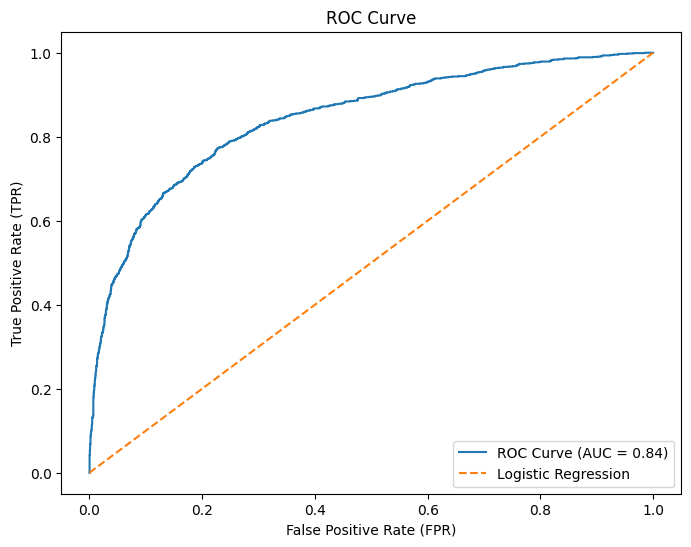

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle ='--', label = 'Logistic Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# ROC Curve and AUC - Random Forest Classifier Model
# Get predicted probabilities for the positive class
y_pred_rf_prob = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_prob)
auc_rf = roc_auc_score(y_test, y_pred_rf_prob)

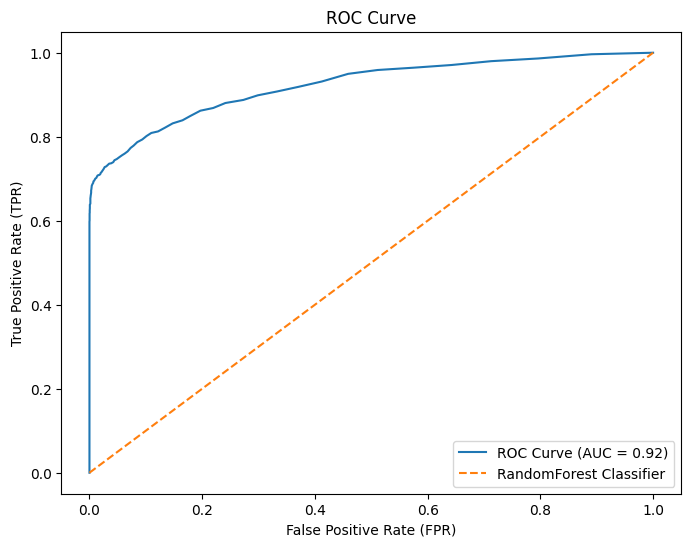

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle ='--', label = 'RandomForest Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# ROC Curve and AUC - Decision Tree Classifier Model
# Get predicted probabilities for the positive class
y_pred_dt_prob = model_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt_prob)
auc_dt = roc_auc_score(y_test, y_pred_dt_prob)

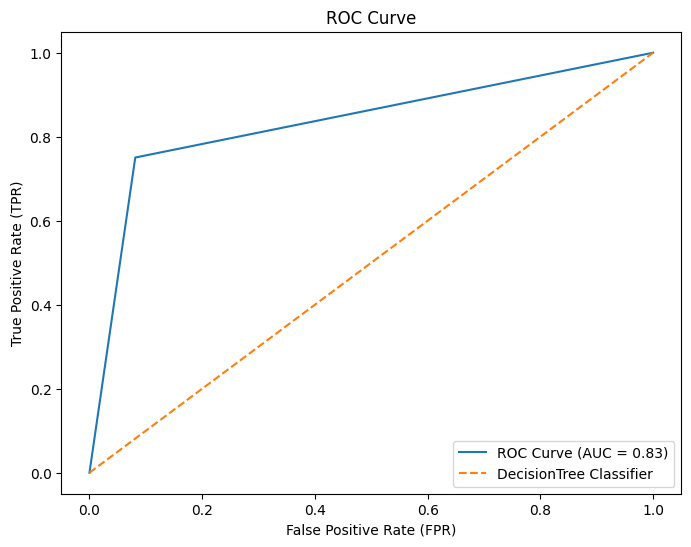

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC Curve (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle ='--', label = 'DecisionTree Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

**Logistic Regression Model (AUC = 0.84):**

- The ROC curve shows that the logistic regression model does a good job of distinguishing between loan repayment and loan default. An AUC score of 0.84 indicates decent performance but leaves room for improvement in identifying defaults and repayments more accurately.

**Random Forest Classifier Model (AUC = 0.92):**

- The ROC curve for the random forest model is the most curved, showing it is better at separating loan repayment from loan default compared to the other models. With an AUC of 0.92, this model performs the best, being highly effective at correctly identifying loan defaults and minimizing mistakes.

**Decision Tree Classifier Model (AUC = 0.83):**

- The decision tree model has the least curved ROC, showing it doesn’t separate the classes as well as the other two models. An AUC score of 0.83 means it performs adequately but is not as strong as the random forest or logistic regression models.

## **Recommendations**

The below are reccomendations that can be utilized by Prospera Bank to make a more informed lending decisions.

- **Risk-Based Loan Products:** Create loan products tailored to borrowers based on their risk profile. For young borrowers or those with short employment histories, offer smaller loans with lower interest rates. For higher-income applicants with stable employment (e.g., 4-5 years), offer larger loan amounts with more flexible terms.

- **Leverage Credit History for Better Prediction:** Use credit prior default as a stronger predictive feature for loan approval. If applicants have ever defaulted in paying back loans, they should be subject to stricter evaluation criteria, or higher interest rates may apply to offset risk.

- **Focus on Low-Default Categories:** Categories like education loans and homeownership applicants showed lower default rates. These groups can be offered better terms. Target marketing and outreach to these segments to increase approval rates and reduce defaults.

- **Loan-to-Income Ratio:** Loan percent income was found to be a useful indicator. Applicants requesting loans greater than 25% of their income should be assessed more rigorously. Consider applying stricter lending limits for high loan-to-income ratios or offer these applicants lower amounts.

- **Modeling for Default Prediction:** Utilize the Random Forest Model, as it demonstrated the highest performance in predicting loan defaults. Ensure it is retrained regularly with new data for better performance. Additionally, the model's insights should be used to refine loan risk scoring and approval thresholds, potentially automating decisions for faster approvals and fewer defaults.

- **Financial Literacy Programs:** Educate applicants on better money management, particularly younger individuals who might not fully understand the impact of high debt levels. Offering these programs could reduce the likelihood of default and improve overall borrower financial health.

- **Continuous Monitoring and Feedback Loop:** Regularly monitor loan performance data and feedback from borrowers. As new economic conditions or borrower behaviors emerge, continuously update the models and approval criteria to remain aligned with current market conditions.


By addressing the insights and taking a targeted approach to risk management, Prospera Bank can optimize loan approval processes, reduce defaults, and create more equitable loan offerings tailored to borrowers' specific financial situations. The key lies in leveraging data more effectively and focusing on the most predictive features such as income, credit history, loan grade, loan intent, loan amount, and loan-to-income ratios.